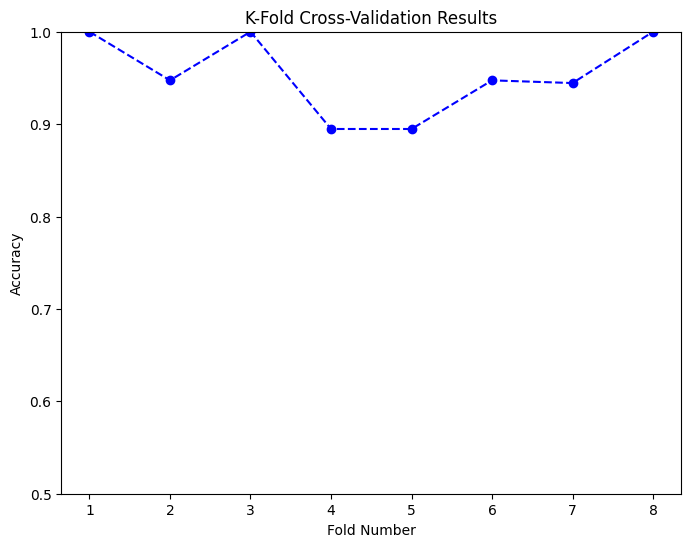

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris


# Load the iris dataset
iris= load_iris()
X= iris.data
y= iris.target

# Define the decision tree classifier
clf= DecisionTreeClassifier()

# perform k-fold cross validation with k=5
score= cross_val_score(clf, X, y, cv=8)

# plot the results
plt.figure(figsize=(8, 6))
plt.plot(range(1,9), score, color='blue', linestyle='dashed', marker='o')
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

# Cross Validation:

In [6]:
%%time
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Load the dataset
iris= load_iris()

# Define the GussainNB model
nb= GaussianNB()

# Perform k-fold cross-validation with k=5
score= cross_val_score(nb, iris.data, iris.target, cv=5, scoring='accuracy')

# Perform the scores for each fold and the mean score
print('Scores for each fold:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

Scores for each fold: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean Score: 0.9533333333333334
Standard Deviation: 0.02666666666666666
CPU times: total: 46.9 ms
Wall time: 57.2 ms


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns

df= sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
X= df[['total_bill', 'tip', 'size']]
y= df['sex']


# Define the Gaussain Naive model
nb= GaussianNB()

# Perform k-fold cross-validation with k=5
scores= cross_val_score(nb, X, y, cv=5, scoring='accuracy')

# Perform the scores for each fold and the mean score
print('Scores for each fold:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())


Scores for each fold: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean Score: 0.9533333333333334
Standard Deviation: 0.02666666666666666


# Pipelining:

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# load the titanic datasetfrom seaborn 
titanaic_data= sns.load_dataset('titanic')

# Select features and target variables
X= titanaic_data[['pclass', 'sex', 'age', 'fare', 'embarked']]
y= titanaic_data['survived']

# Select the data into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer for imputing missing values
numeric_features=['age', 'fare']
categorical_features= ['pclass', 'sex', 'embarked']

numeric_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer= Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with the preprocessor and RandomForestClassifier
pipeline= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make prediction on the test data
y_pred= pipeline.predict(X_test)

# Calculate the accuracy score
accuracy= accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7821229050279329


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# load the titanic datasetfrom seaborn 
titanaic_data= sns.load_dataset('titanic')

# Select features and target variables
X= titanaic_data[['pclass', 'sex', 'age', 'fare', 'embarked']]
y= titanaic_data['survived']

# Select the data into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline= Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('model', RandomForestClassifier(random_state=42))
])

# Define the hyperparameters to tune
hyperparameters= {
    'model_n_estimators':[100, 200, 300],
    'model_max_depth': [None, 5, 10],
    'model_min_samples_split': [2, 5, 10]
}

# perform GridSearchCV:
grid_search_cv= GridSearchCV(pipeline, hyperparameters, cv=5)
grid_search_cv.fit(X_train, y_train)

# Get the best model
best_model= grid_search_cv.best_estimator_

# Make predictions on the test data using the best model
y_pred= best_model.predict(X_test)

# Calculate the best hyperperameters
accuracy= accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# print the best hyperparameters
print('Best Hyperparameters:', grid_search_cv.best_params_)